In [1]:
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews
fileids = movie_reviews.fileids()

reviews = [movie_reviews.raw(fileid) for fileid in fileids]

categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

print('Reviews count:', len(reviews))
print('Length of the first review:', len(reviews[0]))
print('Label:', set(categories))

Reviews count: 2000
Length of the first review: 4043
Label: {'neg', 'pos'}


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(7)
tf.random.set_seed(7)

max_words = 10000

tokenizer = Tokenizer(num_words=max_words, oov_token='UNK')

tokenizer.fit_on_texts(reviews)

X = tokenizer.texts_to_sequences(reviews)

print('Lengths of first 10 documents:', [len(doc) for doc in X[:10]])

Lengths of first 10 documents: [710, 240, 486, 479, 733, 671, 550, 584, 702, 776]


In [3]:
import numpy as np
print("Index of 'the':", tokenizer.word_index["the"])
print("Index of 'review':", tokenizer.word_index["review"])
print("Index of out-of-vocabulary words:", tokenizer.word_index["UNK"])

Index of 'the': 2
Index of 'review': 466
Index of out-of-vocabulary words: 1


In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 500

X = pad_sequences(X, maxlen=maxlen, truncating='pre')

In [5]:
import numpy as np

label_dict = {'pos':1, 'neg':0}
y = np.array([label_dict[c] for c in categories])
print(set(y))

{0, 1}


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('Train set count:', len(X_train))
print('Test set count:', len(X_test))
print('Test samples:', y_test[:20])

Train set count: 1600
Test set count: 400
Test samples: [0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1]


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential([
    Embedding(max_words, 32, input_length=maxlen),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 1)                 16001     
                                                                 
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 4s 26ms/step - loss: 0.6910 - acc: 0.5289 - val_loss: 0.6884 - val_acc: 0.5562
Epoch 2/10
40/40 [==============================] - 1s 16ms/step - loss: 0.5854 - acc: 0.9195 - val_loss: 0.6764 - val_acc: 0.5969
Epoch 3/10
40/40 [==============================] - 1s 16ms/step - loss: 0.4474 - acc: 0.9766 - val_loss: 0.6515 - val_acc: 0.6250
Epoch 4/10
40/40 [==============================] - 1s 16ms/step - loss: 0.2892 - acc: 0.9945 - val_loss: 0.6208 - val_acc: 0.6531
Epoch 5/10
40/40 [==============================] - 1s 19ms/step - loss: 0.1599 - acc: 0.9984 - val_loss: 0.5919 - val_acc: 0.6812
Epoch 6/10
40/40 [==============================] - 1s 19ms/step - loss: 0.0776 - acc: 1.0000 - val_loss: 0.5779 - val_acc: 0.6781
Epoch 7/10
40/40 [==============================] - 1s 15ms/step - loss: 0.0343 - acc: 1.0000 - val_loss: 0.5660 - val_acc: 0.6906
Epoch 8/10
40/40 [==============================] - 1s 17ms/step - loss: 0.0138 - a

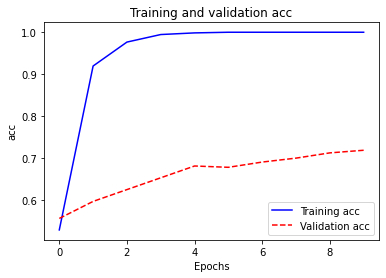

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_results(history, metric):
  plt.plot(history.history[metric], 'b', label='Training ' + metric)
  plt.plot(history.history['val_'+metric], 'r--', label='Validation ' + metric)
  plt.title('Training and validation '+metric)
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend()
  plt.show()

plot_results(history, 'acc')

In [10]:
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

13/13 [==============================] - 0s 8ms/step - loss: 0.5704 - acc: 0.7075
#Test accuracy:0.707


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 323,169
Trainable params: 323,169
Non-trainable params: 0
_________________________________________________________________


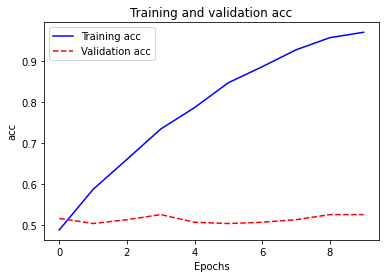

13/13 [==============================] - 1s 23ms/step - loss: 0.7570 - acc: 0.5050
Test accuracy:0.505


In [11]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Embedding(max_words, 32),

    SimpleRNN(32),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')   
])
model.summary()

adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, verbose=0, validation_split=0.2)
plot_results(history, 'acc')

score = model.evaluate(X_test, y_test)
print(f'Test accuracy:{score[1]:.3f}')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          640000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 714,369
Trainable params: 714,369
Non-trainable params: 0
_________________________________________________________________


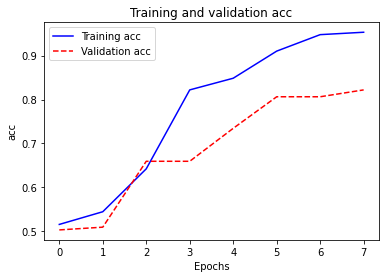

13/13 [==============================] - 2s 110ms/step - loss: 0.4526 - acc: 0.8250
#Test accuracy:0.825


In [12]:
from tensorflow.keras.layers import LSTM, Bidirectional

model = Sequential([
    Embedding(max_words, 64),
    Bidirectional(LSTM(64)), # simple RNN 대신 bidirectional LSTM을 사용
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, 
                    epochs=8,
                    verbose=0,
                    validation_split=0.2)

plot_results(history, 'acc')

#테스트 셋으로 학습된 모형의 성능을 평가
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

In [13]:
y_pred = np.round(model.predict(X_test[:10]))
for pred, y_t in zip(y_pred, y_test[:10]):
  print(
      f'predicted value: {pred[0]}, true value: {y_t}, so the prediction is {pred[0] == y_t}'
  )

1/1 [==============================] - 1s 1s/step
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
